In [1]:
import pandas as pd
from pathlib import Path

# Read the combined defects file
folder_path = Path('defect_data')
df = pd.read_excel(folder_path / 'combined_defects.xlsx')


In [2]:
print("DataFrame Info:")
print("-" * 50)
df.info()

print("\nDataFrame Shape:")
print("-" * 50)
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

print("\nFirst few rows:")
print("-" * 50)
print(df.head())

print("\nBasic statistics:")
print("-" * 50)
print(df.describe())

print("\nMissing values:")
print("-" * 50)
print(df.isnull().sum())


DataFrame Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   model_name         4718 non-null   object
 1   date_time          4718 non-null   object
 2   board_sn           4718 non-null   object
 3   t_b                4718 non-null   object
 4   board_no           4718 non-null   int64 
 5   comp_name          4718 non-null   object
 6   type               4718 non-null   object
 7   inspection_result  4718 non-null   object
 8   judgment           4718 non-null   object
 9   modified_date      4718 non-null   object
 10  modifier           4718 non-null   object
 11  lot_no             4718 non-null   int64 
 12  value              4718 non-null   object
 13  sgroup             4718 non-null   object
dtypes: int64(2), object(12)
memory usage: 516.2+ KB

DataFrame Shape:
---

In [3]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Print information about duplicates removed
num_duplicates = len(df) - len(df_no_duplicates)
print(f"\nDuplicate Rows Removed:")
print("-" * 50)
print(f"Original rows: {len(df)}")
print(f"Rows after removing duplicates: {len(df_no_duplicates)}")
print(f"Number of duplicate rows removed: {num_duplicates}")

# Update the main dataframe
df = df_no_duplicates



Duplicate Rows Removed:
--------------------------------------------------
Original rows: 4718
Rows after removing duplicates: 2995
Number of duplicate rows removed: 1723


In [4]:
print("DataFrame Info:")
print("-" * 50)
df.info()

print("\nDataFrame Shape:")
print("-" * 50)
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

print("\nFirst few rows:")
print("-" * 50)
print(df.head())

print("\nBasic statistics:")
print("-" * 50)
print(df.describe())

print("\nMissing values:")
print("-" * 50)
print(df.isnull().sum())


DataFrame Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2995 entries, 0 to 4702
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   model_name         2995 non-null   object
 1   date_time          2995 non-null   object
 2   board_sn           2995 non-null   object
 3   t_b                2995 non-null   object
 4   board_no           2995 non-null   int64 
 5   comp_name          2995 non-null   object
 6   type               2995 non-null   object
 7   inspection_result  2995 non-null   object
 8   judgment           2995 non-null   object
 9   modified_date      2995 non-null   object
 10  modifier           2995 non-null   object
 11  lot_no             2995 non-null   int64 
 12  value              2995 non-null   object
 13  sgroup             2995 non-null   object
dtypes: int64(2), object(12)
memory usage: 351.0+ KB

DataFrame Shape:
--------

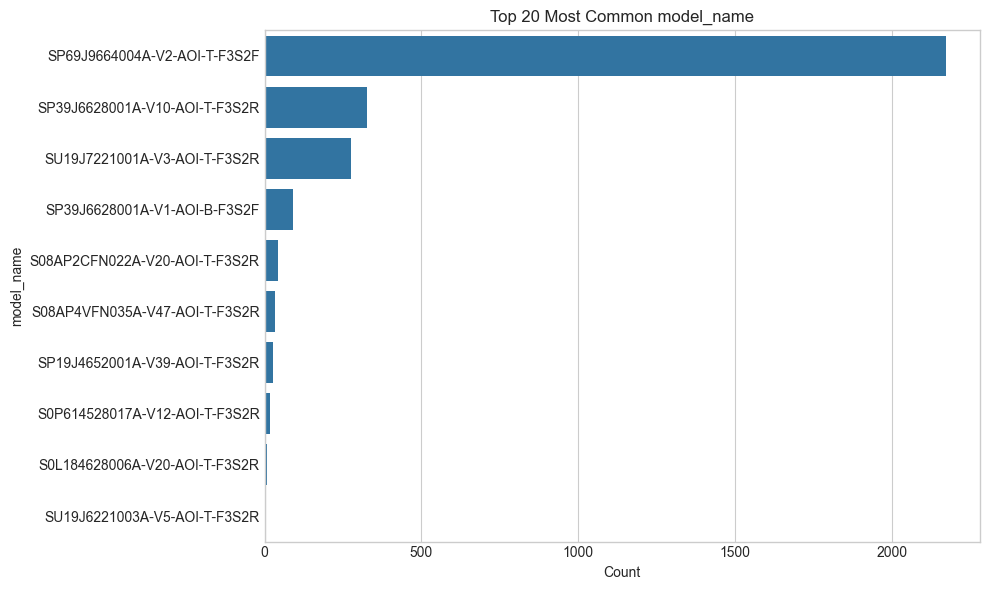

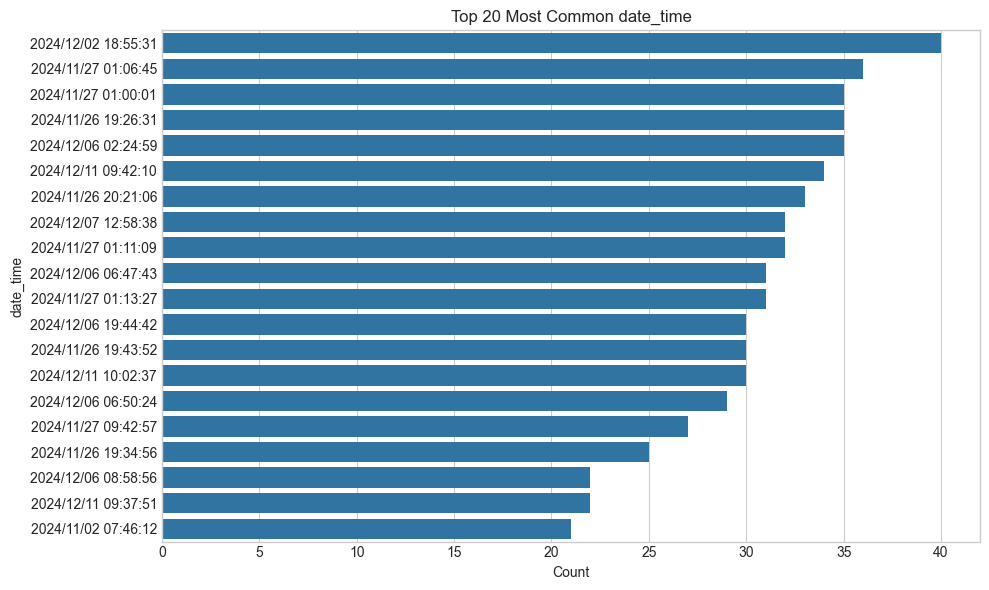

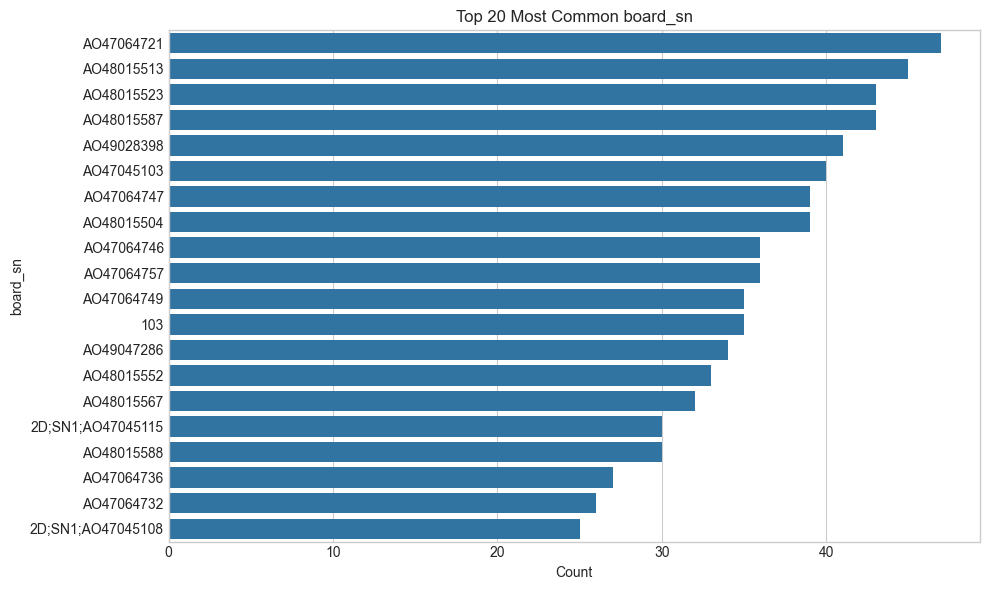

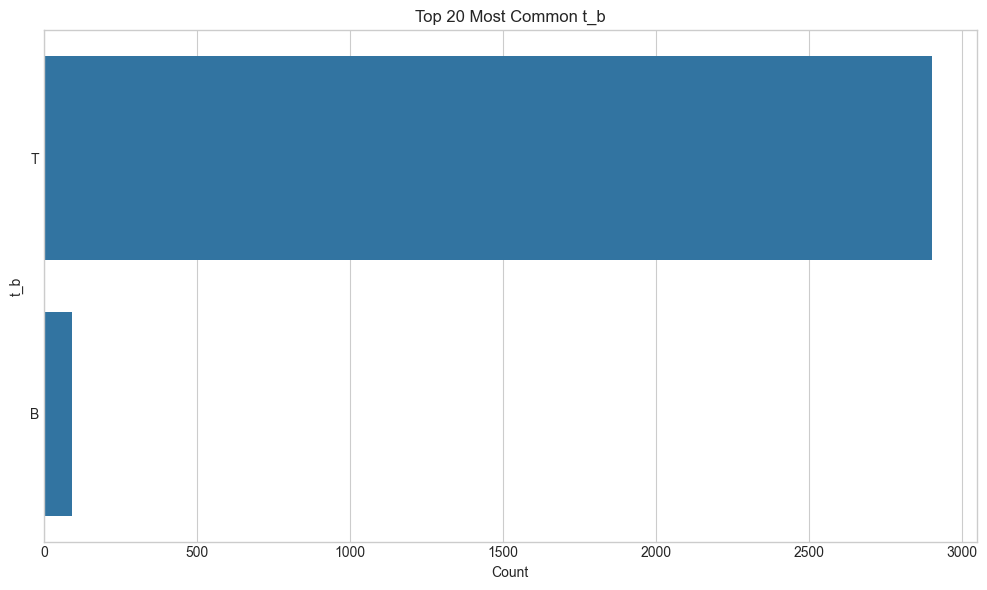

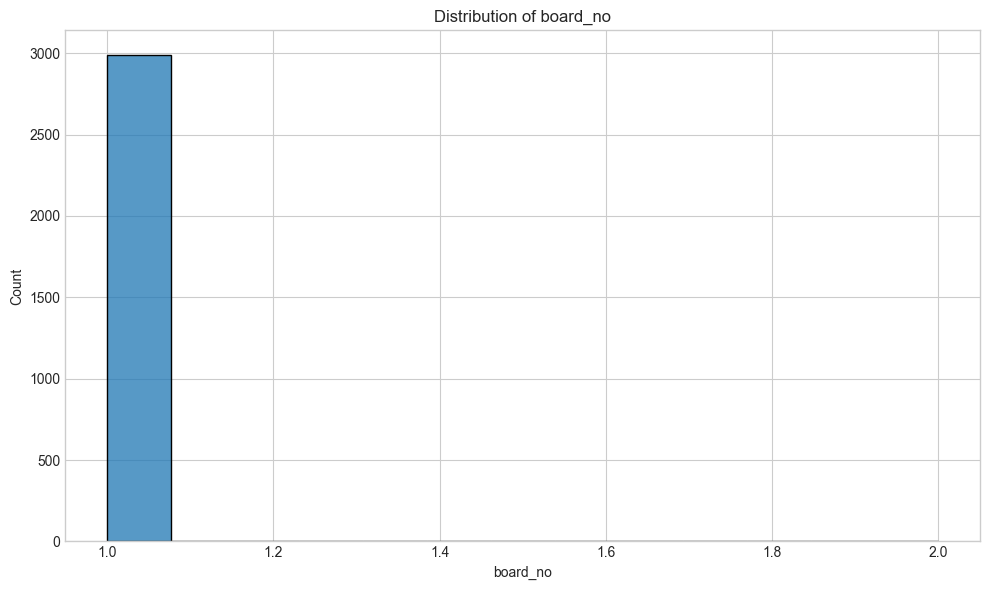

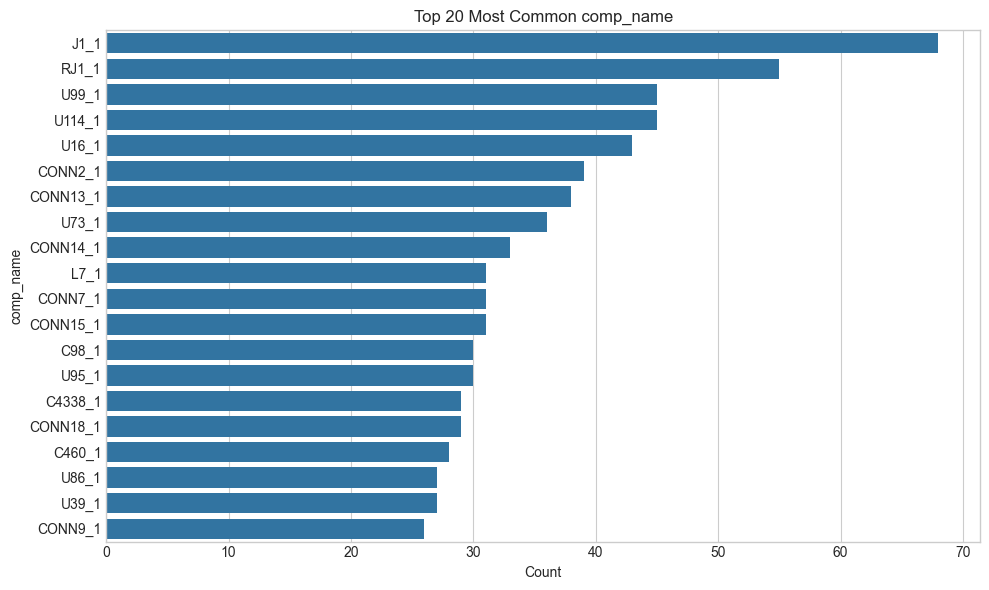

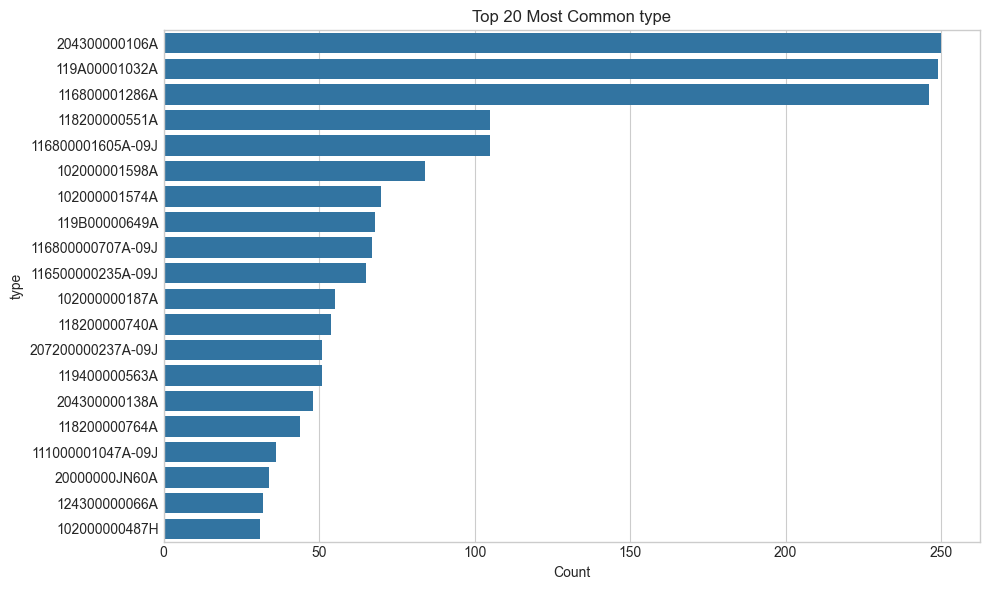

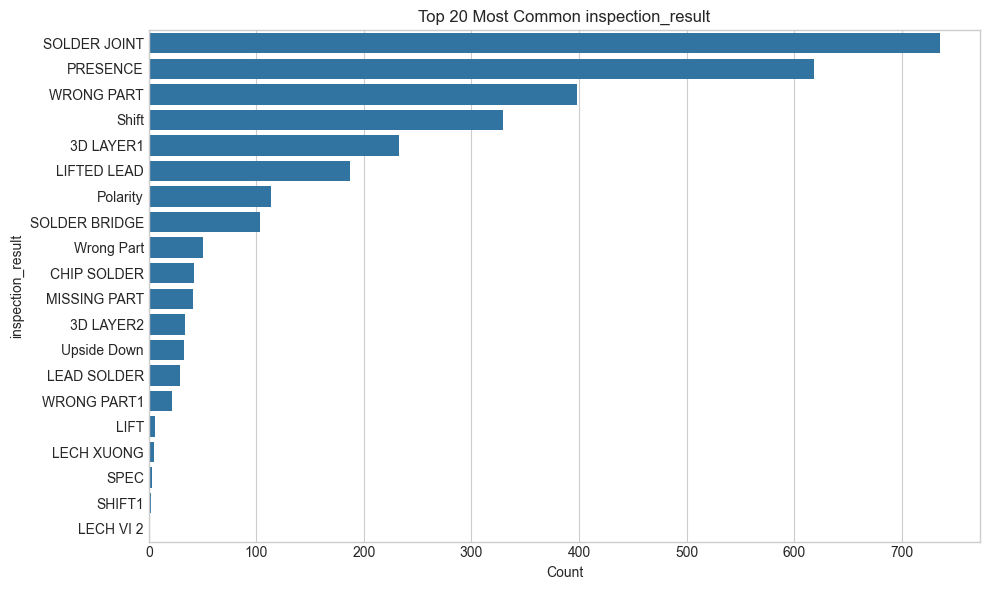

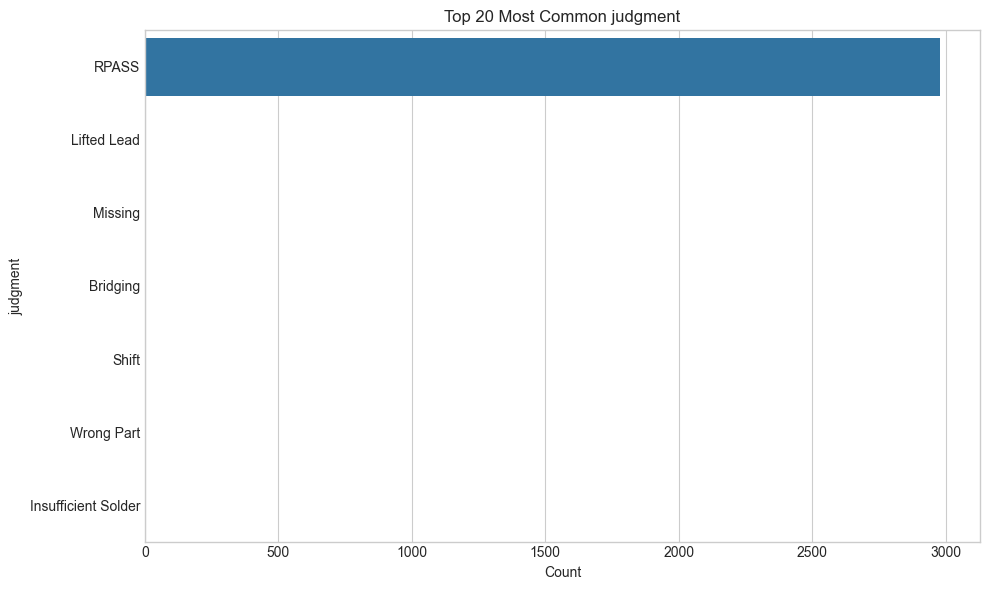

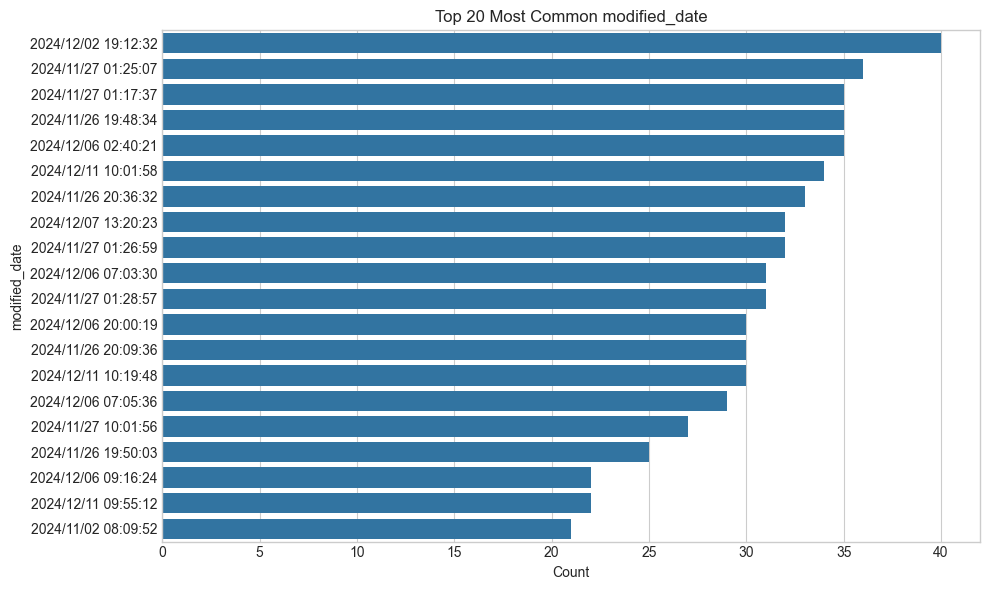

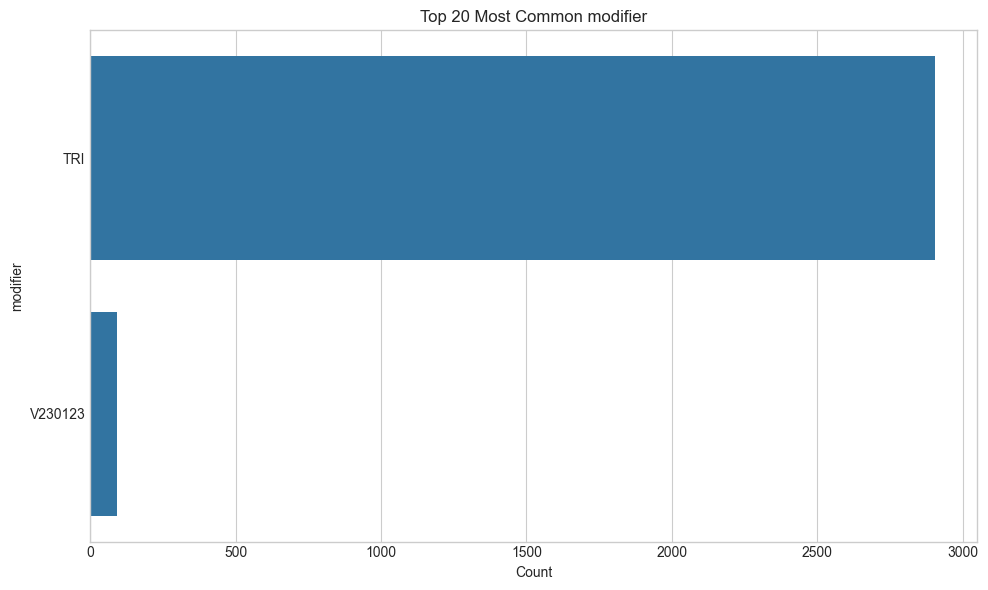

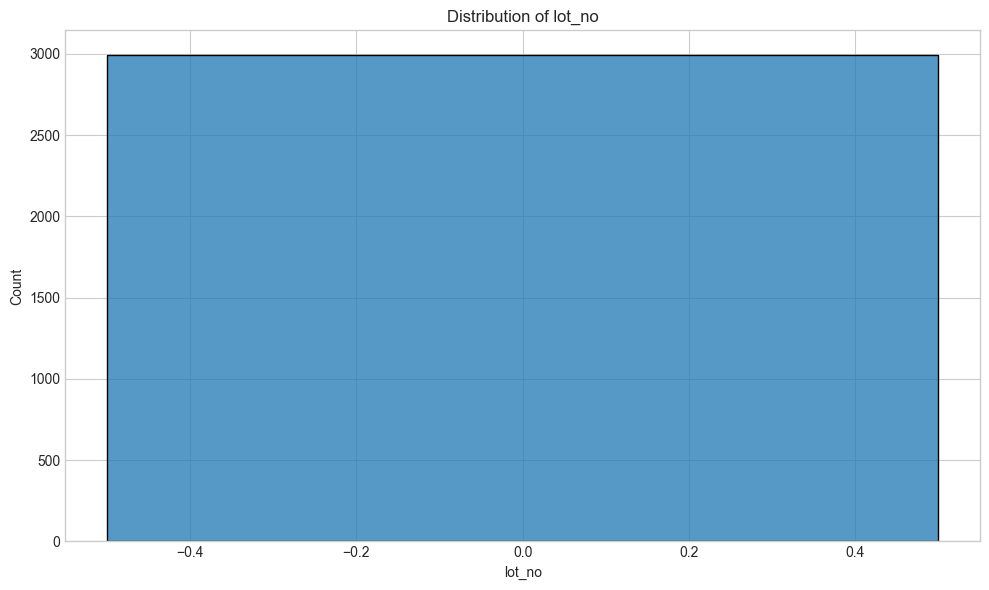

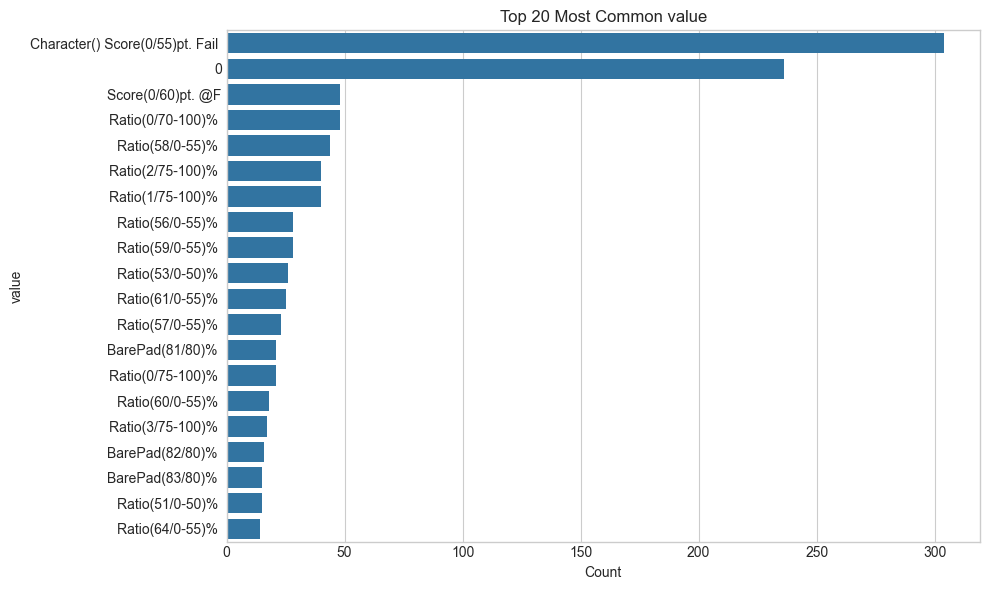

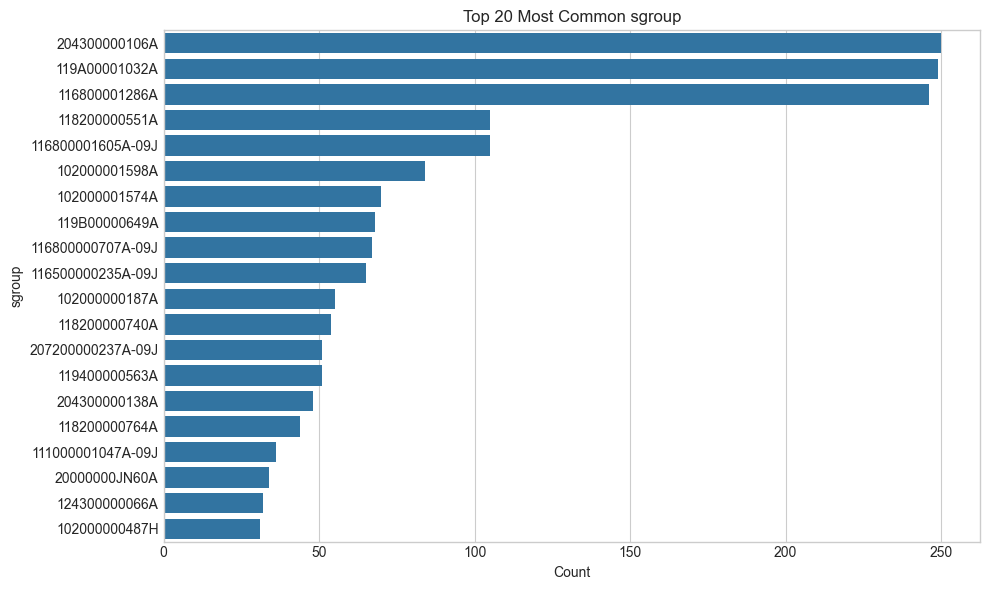

In [6]:
# Create visualizations for each column
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a visualization for each column
for column in df.columns:
    plt.figure(figsize=(10, 6))
    
    if df[column].dtype in ['int64', 'float64']:
        # For numerical columns, create a histogram
        sns.histplot(data=df, x=column)
        plt.title(f'Distribution of {column}')
    else:
        # For categorical columns, show top 20 categories in horizontal bar plot
        value_counts = df[column].value_counts().nlargest(20)  # Get top 20
        sns.barplot(y=value_counts.index, x=value_counts.values)
        plt.title(f'Top 20 Most Common {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()

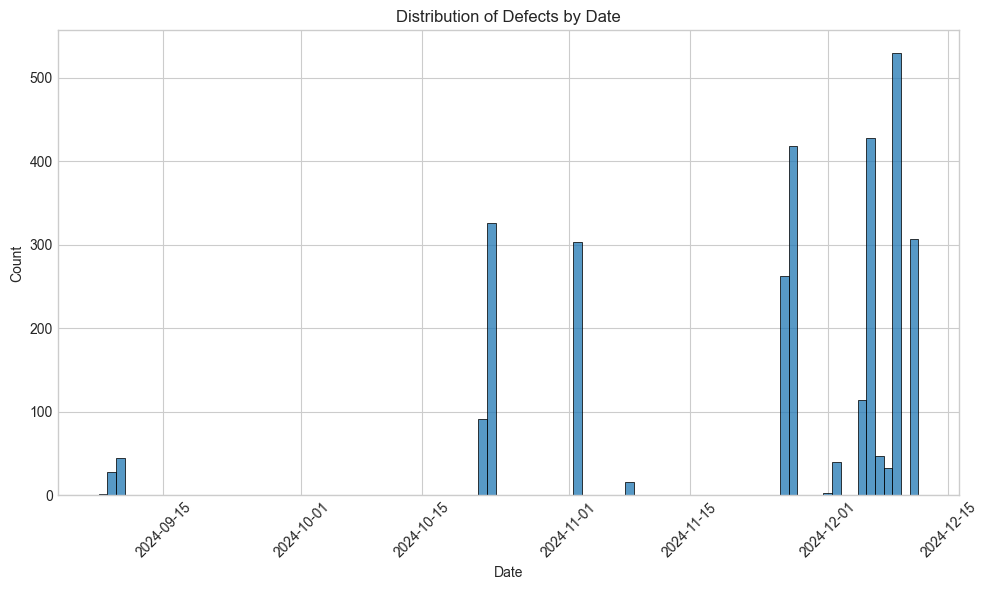

In [7]:
# Create a new column with just the date part
df['Date'] = pd.to_datetime(df['date_time']).dt.date

# Create visualization for the date distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Date')
plt.title('Distribution of Defects by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


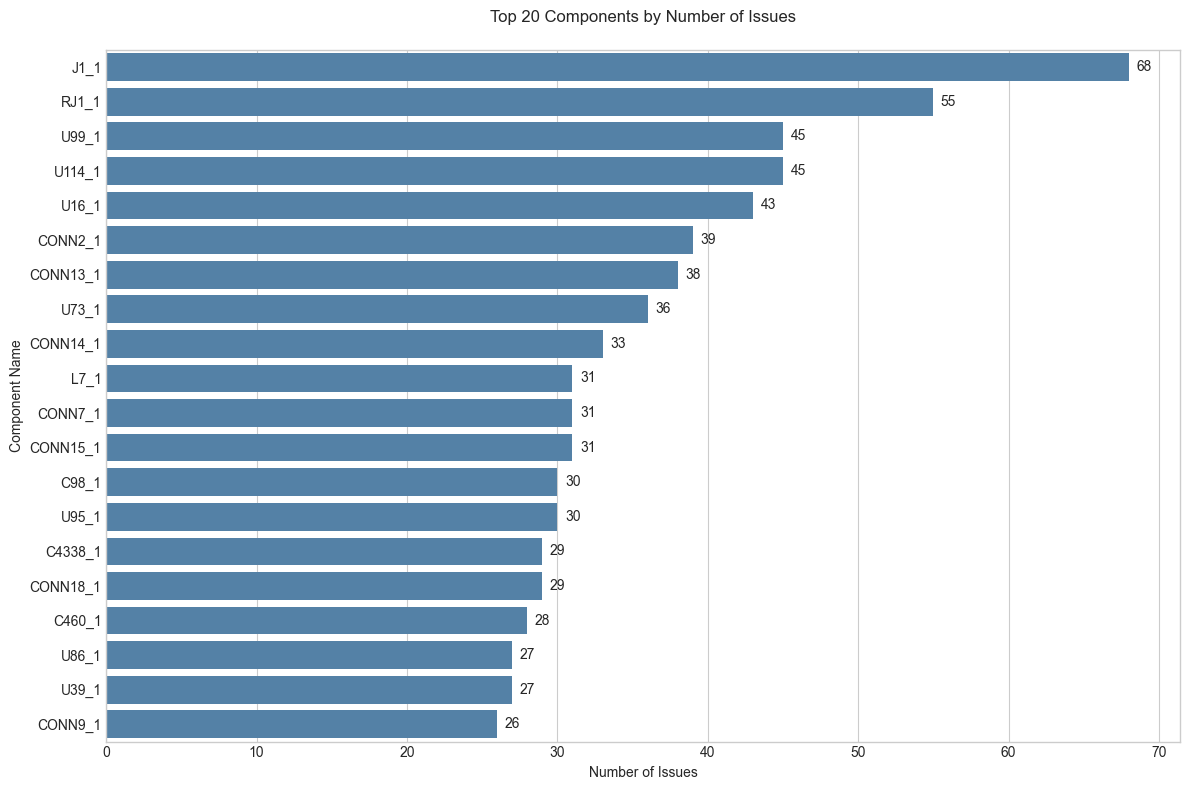

In [8]:
# Create a bar plot for top 20 component frequencies
plt.figure(figsize=(12, 8))

# Get value counts, sort in descending order, and take top 20
comp_counts = df['comp_name'].value_counts().nlargest(20)

# Create horizontal bar plot
sns.barplot(y=comp_counts.index, x=comp_counts.values, color='steelblue')

plt.title('Top 20 Components by Number of Issues', pad=20)
plt.xlabel('Number of Issues')
plt.ylabel('Component Name')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add value labels on the bars
for i, v in enumerate(comp_counts.values):
    plt.text(v + 0.5, i, str(v), va='center')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

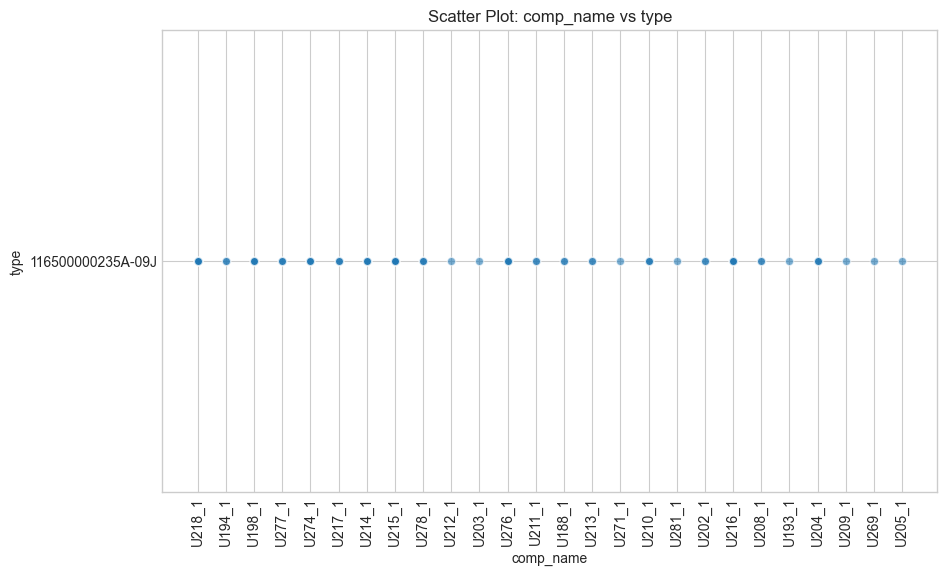

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# # Đọc dữ liệu
# data = pd.read_csv("defect_data/combined_defects.xlsx")  # Chuyển dữ liệu sang file CSV
filtered_df = df[df['type'] == '116500000235A-09J']
# filtered_df = df[df['comp_name'] == 'J1_1']
plt.figure(figsize=(10, 6))

# Tạo biểu đồ phân tán
plt.scatter(filtered_df['comp_name'], filtered_df['type'], alpha=0.6, edgecolors='w')
plt.xticks(rotation=90)
plt.title("Scatter Plot: comp_name vs type")
plt.xlabel("comp_name")
plt.ylabel("type")
plt.show()


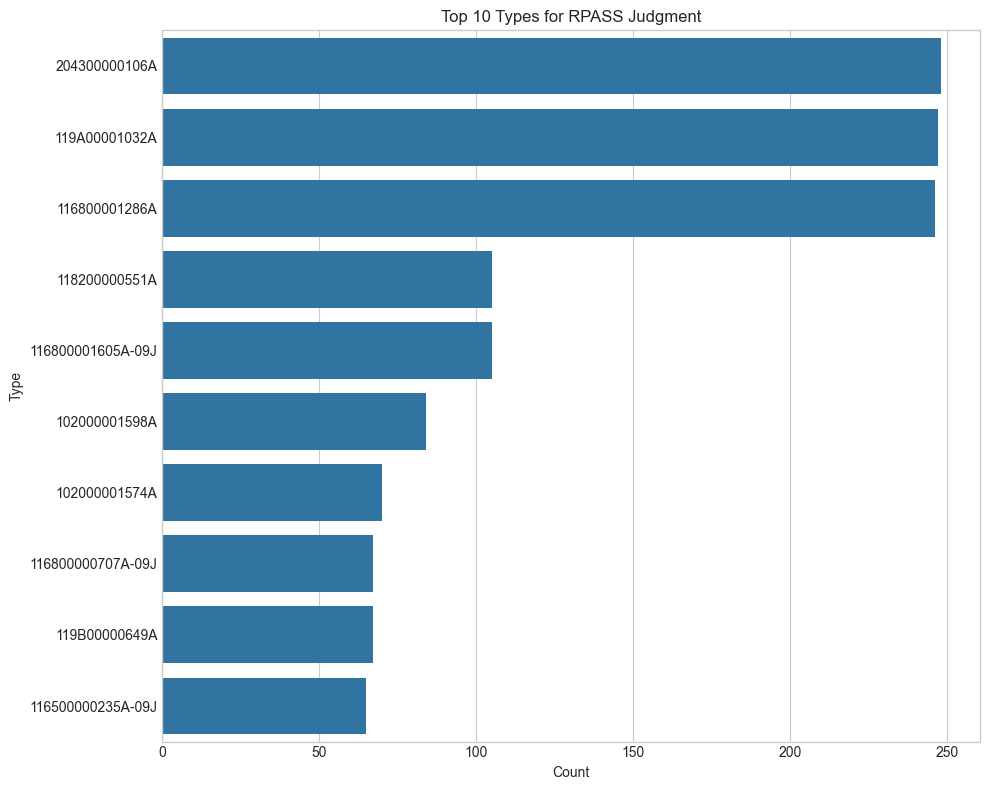

In [9]:
# Filter data for "RPASS" judgment
rpass_df = df[df['judgment'] == 'RPASS']

# Get top 10 types for RPASS judgment
top_types = rpass_df['type'].value_counts().nlargest(10)

# Create bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_types.values, y=top_types.index)

plt.title('Top 10 Types for RPASS Judgment')
plt.xlabel('Count')
plt.ylabel('Type')

# Adjust layout
plt.tight_layout()
plt.show()


(-1.09999964557209,
 1.0999999831224805,
 -1.0999999729812706,
 1.0999999614511209)

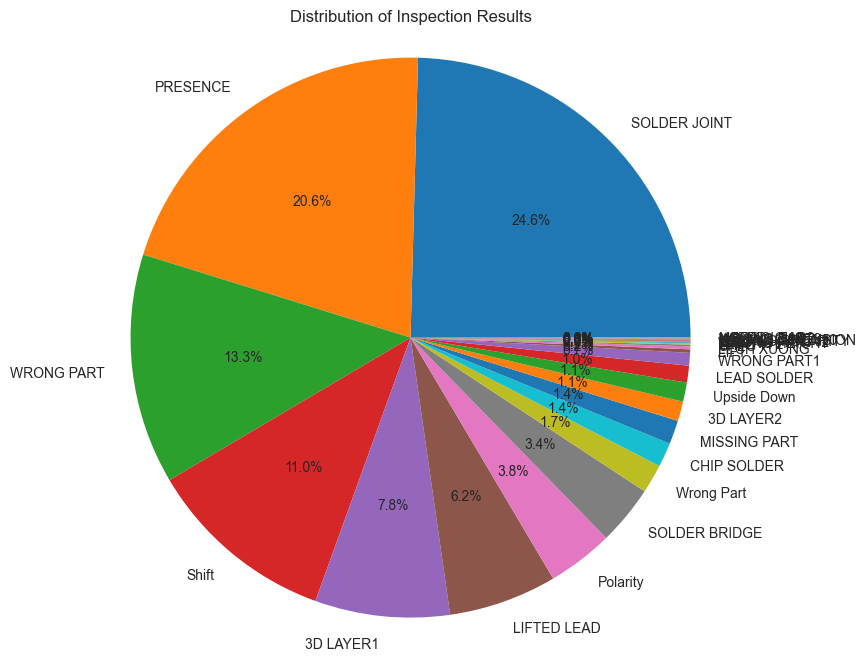

In [10]:
# Create a pie chart for inspection results
plt.figure(figsize=(10, 8))
inspection_counts = df['inspection_result'].value_counts()
plt.pie(inspection_counts, labels=inspection_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Inspection Results')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle



Judgment Distribution:
judgment
RPASS                  2980
Lifted Lead               5
Missing                   4
Bridging                  2
Shift                     2
Wrong Part                1
Insufficient Solder       1
Name: count, dtype: int64


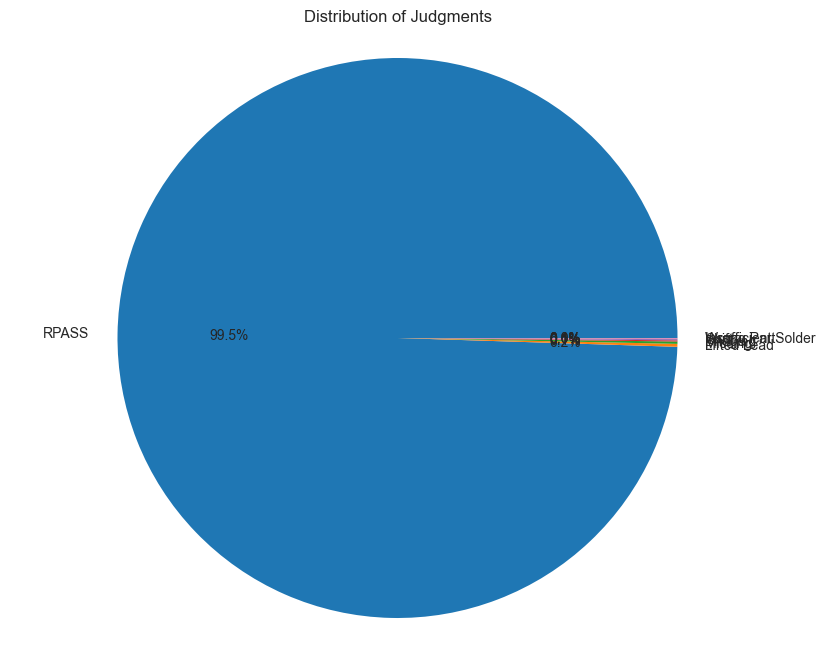

In [11]:
# Count and display the distribution of judgments
judgment_counts = df['judgment'].value_counts()
print("\nJudgment Distribution:")
print(judgment_counts)

# Create a pie chart for judgment distribution
plt.figure(figsize=(10, 8))
plt.pie(judgment_counts, labels=judgment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Judgments')
plt.axis('equal')
plt.show()
